In [1]:
import numpy as np
from scipy.ndimage import maximum_filter

def detect_log_extrema(input_image, laplacian_pyramid, threshold, sigma_levels):
    extrema_x, extrema_y, extrema_scales = [], [], []

    # Iterate over each scale to find local extrema
    for sigma, laplacian_image in zip(sigma_levels, laplacian_pyramid):

        # Apply a 3x3 maximum filter to find local maxima
        maxima_filter_result = maximum_filter(laplacian_image, size=3)

        # Identify coordinates of local maxima
        maxima_locations = np.argwhere(laplacian_image == maxima_filter_result)

        # Filter out extrema below the threshold and record their positions
        for location in maxima_locations:
            if abs(laplacian_image[location[0], location[1]]) > threshold:
                extrema_x.append(location[1])
                extrema_y.append(location[0])
                extrema_scales.append(sigma)

    # Convert lists to numpy arrays before returning
    return np.array(extrema_x), np.array(extrema_y), np.array(extrema_scales)

In [4]:
def generate_laplacian_pyramid(input_image, sigma_values):
    laplacian_pyramid = []

    for sigma in sigma_values:
        smoothed_image = cv2.GaussianBlur(input_image, ksize=(0, 0), sigmaX=sigma, sigmaY=sigma)
        laplacian_image = cv2.Laplacian(smoothed_image, ddepth=cv2.CV_64F)
        laplacian_pyramid.append(laplacian_image)

    return laplacian_pyramid

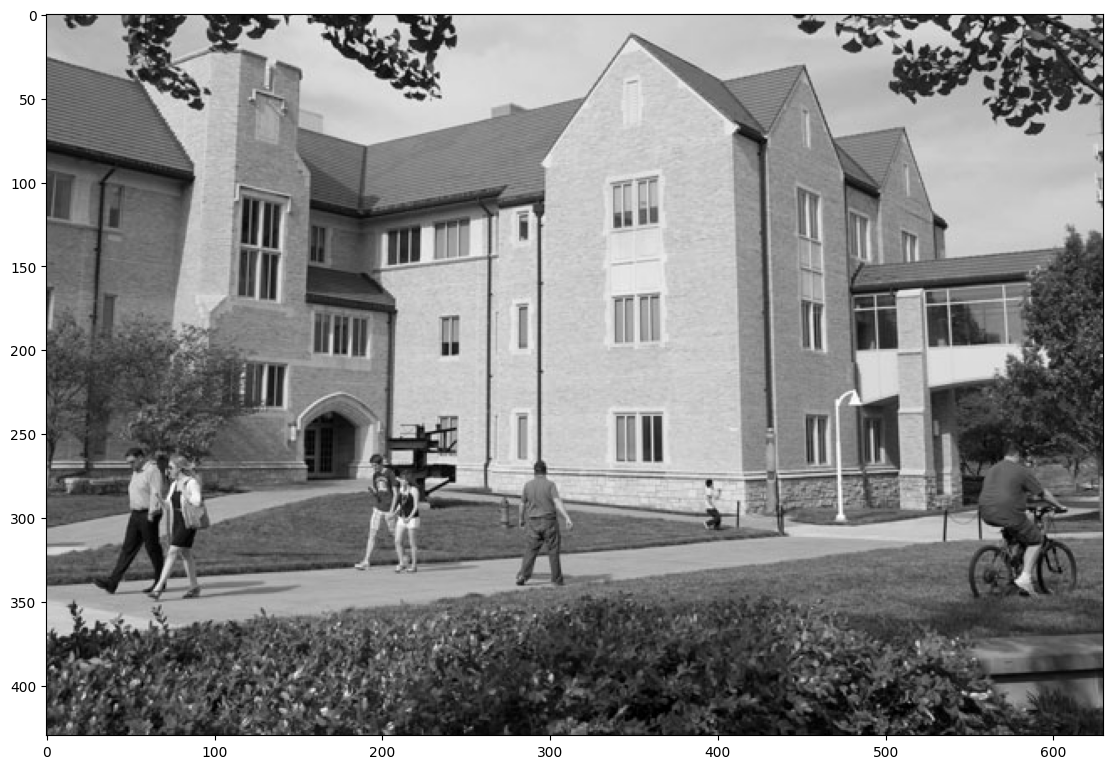

Total key points detected: 0
Sample x-coordinates of key points: []
Sample y-coordinates of key points: []
Sample scales of key points: []


In [8]:
import cv2
import matplotlib.pyplot as plt

path_of_img = "../flarsheim-1.jpg"
loaded_img = cv2.imread(path_of_img, cv2.IMREAD_GRAYSCALE)

scale_values = [4, 8]

log_stack_images = generate_laplacian_pyramid(loaded_img, scale_values)

# Set the threshold for key point detection strength
keypoint_threshold = 10

# Detect key points using the Laplacian of Gaussian method
keypoints_x, keypoints_y, keypoints_scales = detect_log_extrema(loaded_img, log_stack_images, keypoint_threshold, scale_values)

# Clone the original image to create a visualization
visualization_image = loaded_img.copy()

# If the image is grayscale, convert it to a color image for visualization
if visualization_image.ndim == 2:
    visualization_image = cv2.cvtColor(visualization_image, cv2.COLOR_GRAY2BGR)

# Draw circles at each key point location
for x, y, scale in zip(keypoints_x, keypoints_y, keypoints_scales):
    cv2.circle(visualization_image, (x, y), int(scale), (0, 255, 0), 2)

plt.figure(figsize=(30, 10))
for index, img in enumerate([visualization_image]):
    plt.subplot(1, len(scale_values), index + 1)
    plt.imshow(img)
plt.show()

# Output some information about the detected key points
print("Total key points detected:", len(keypoints_x))
print("Sample x-coordinates of key points:", keypoints_x[:5])
print("Sample y-coordinates of key points:", keypoints_y[:5])
print("Sample scales of key points:", keypoints_scales[:5])